#Table of contents
>[Importing libraries and data](#scrollTo=2DULUWPoysFH)

>[EDA and Visualizations](#scrollTo=Y5iqiSqqOKCV)

>[Training model](#scrollTo=w7v1IaqS1rhD)

>>[Linear Regression](#scrollTo=xB4jRJL_OKCh)

>>[Ridge Regression](#scrollTo=hd17jZGjOKCh)

>>[Lasso Regression](#scrollTo=jkAcEmXDOKCi)

>>[Random Forest Regressor](#scrollTo=Uv94czjfOKCi)

>>>[Results and analysis](#scrollTo=dcHxMe3y1Azi)

>>[Polynomial Regression](#scrollTo=00H2h6AuOKCo)



<font size=5 > <p style="color:purple"> Which Factors Influence the Price of Health Insurance?

<img src="https://i.imgur.com/zTnvOcb.jpg" width="800">

# Importing libraries and data

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading data from CSV file

In [2]:
df = pd.read_csv('data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA and Visualizations

The code creates a plot to visualize the distribution of the 'charges' variable using a kernel density estimation (KDE) plot. It sets the style to 'whitegrid', creates a figure and axes object, plots the distribution using sns.distplot, and sets the title of the plot to 'Distribution of Charges'.



Text(0.5, 1.0, 'Distribution of Charges')

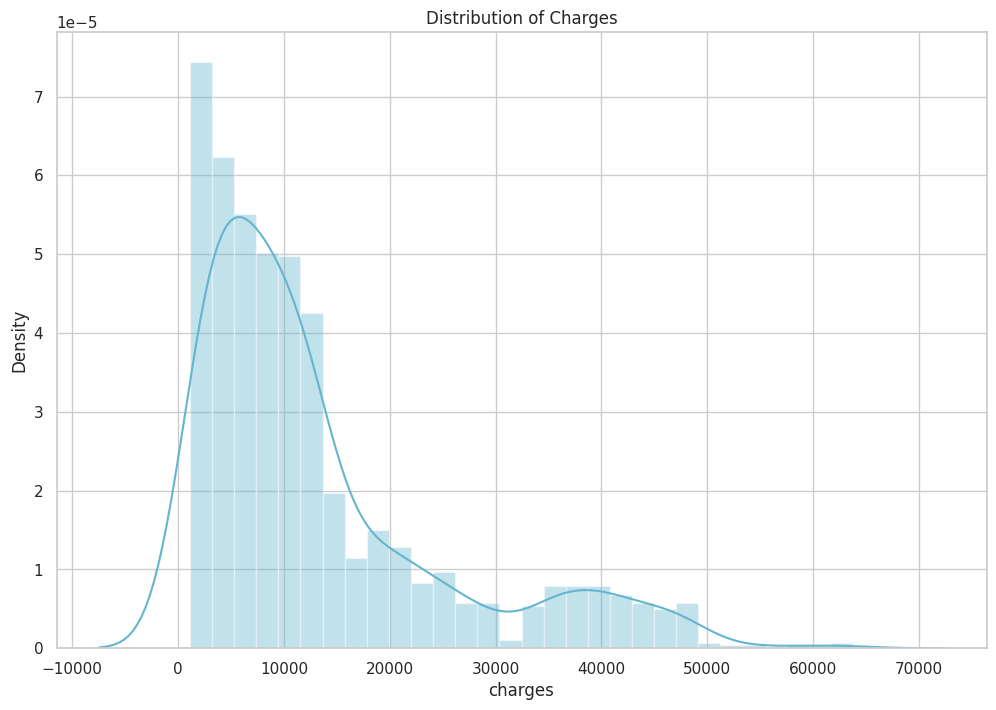

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

The code creates a plot to visualize the distribution of the logarithm (base 10) of the 'charges' variable using a kernel density estimation (KDE) plot. It sets the size of the figure, creates an axes object, plots the distribution using sns.distplot, and sets



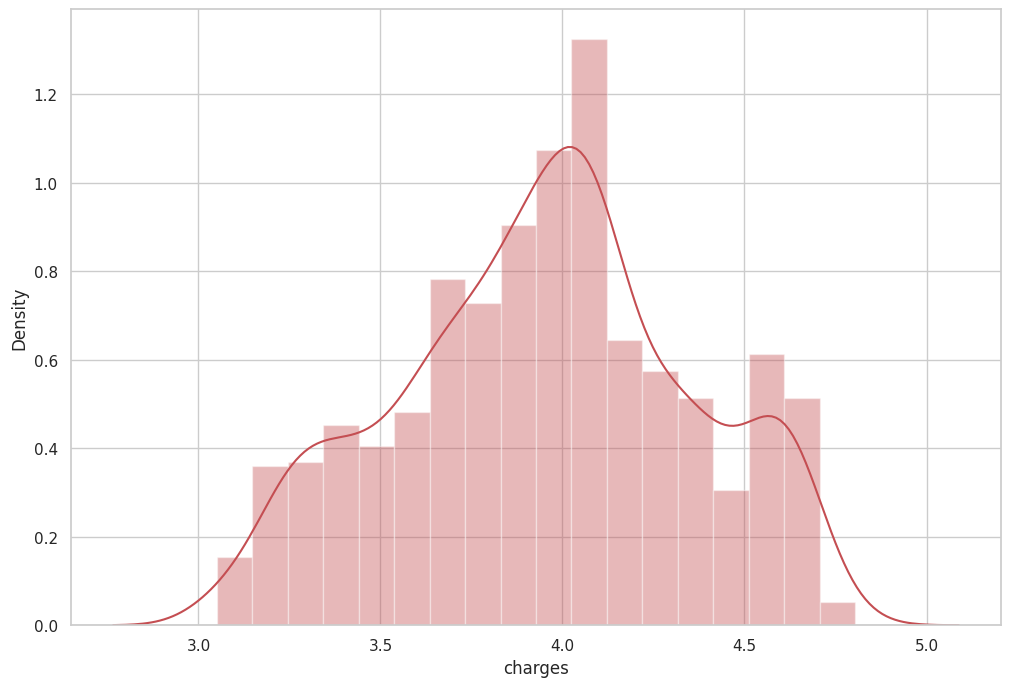

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

The code calculates the total 'charges' grouped by the 'region' column, sorts the values in ascending order, and then creates a bar plot using sns.barplot to visualize the top few regions with the lowest charges. The size of the figure is set, and the color palette for the bars is specified as 'Blues'.



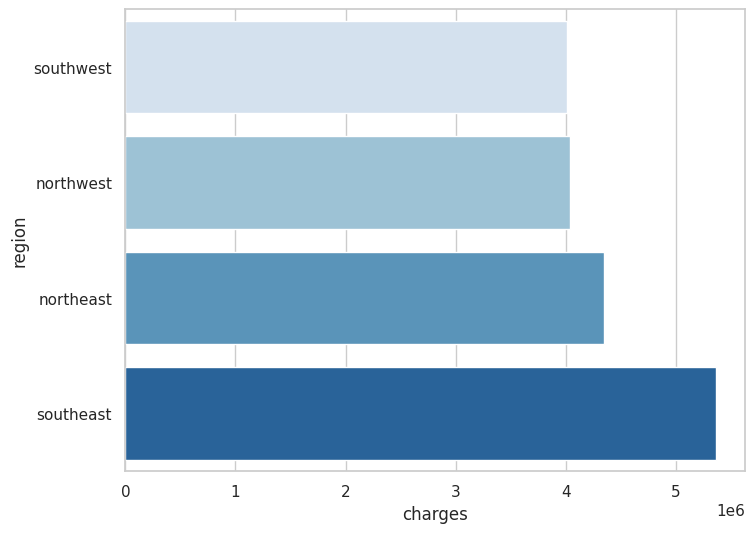

In [9]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

The code creates a bar plot using sns.barplot to compare the 'charges' across different 'regions', with the bars further grouped by 'sex' using the hue parameter. The figure size is set, and the color palette for the bars is specified as 'cool'.






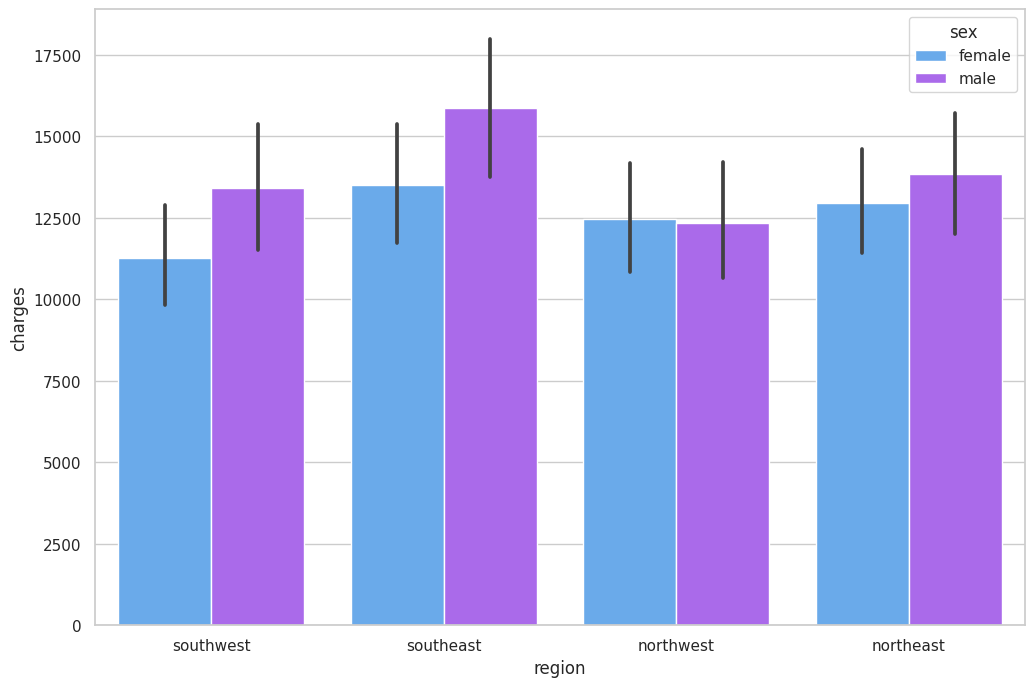

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

The code creates a bar plot using sns.barplot to compare the 'charges' across different 'regions', with the bars further grouped by 'smoker' using the hue parameter. The figure size is set, and the color palette for the bars is specified as 'Reds_r'.



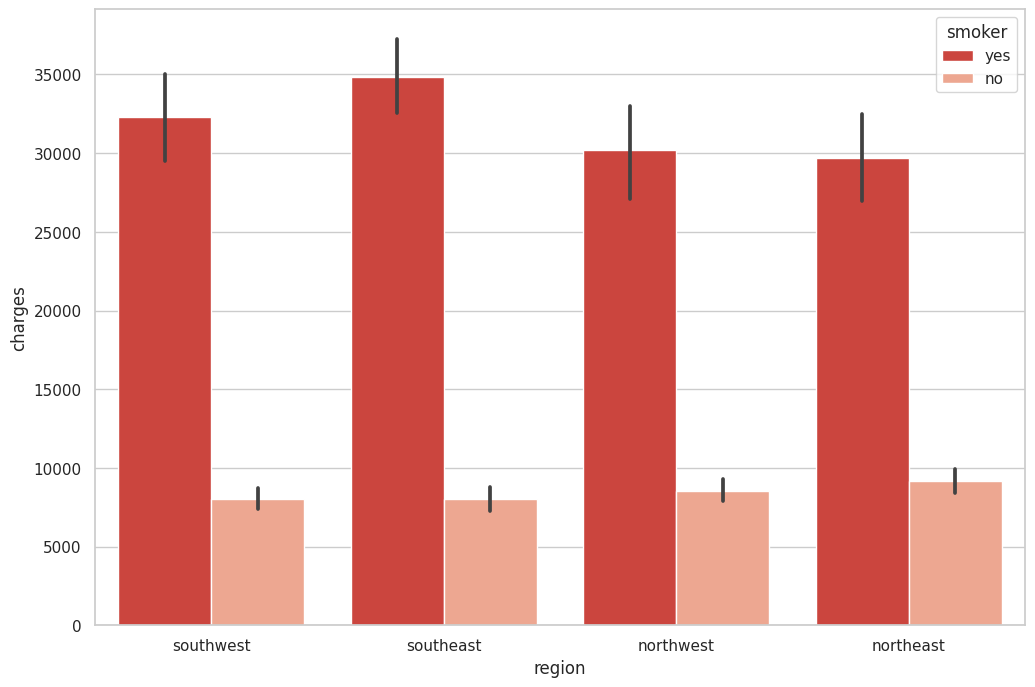

In [11]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

The code creates a bar plot using sns.barplot to compare the 'charges' across different 'regions', with the bars further grouped by the number of 'children' using the hue parameter. The figure size is set, and the color palette for the bars is specified as 'Set1'.






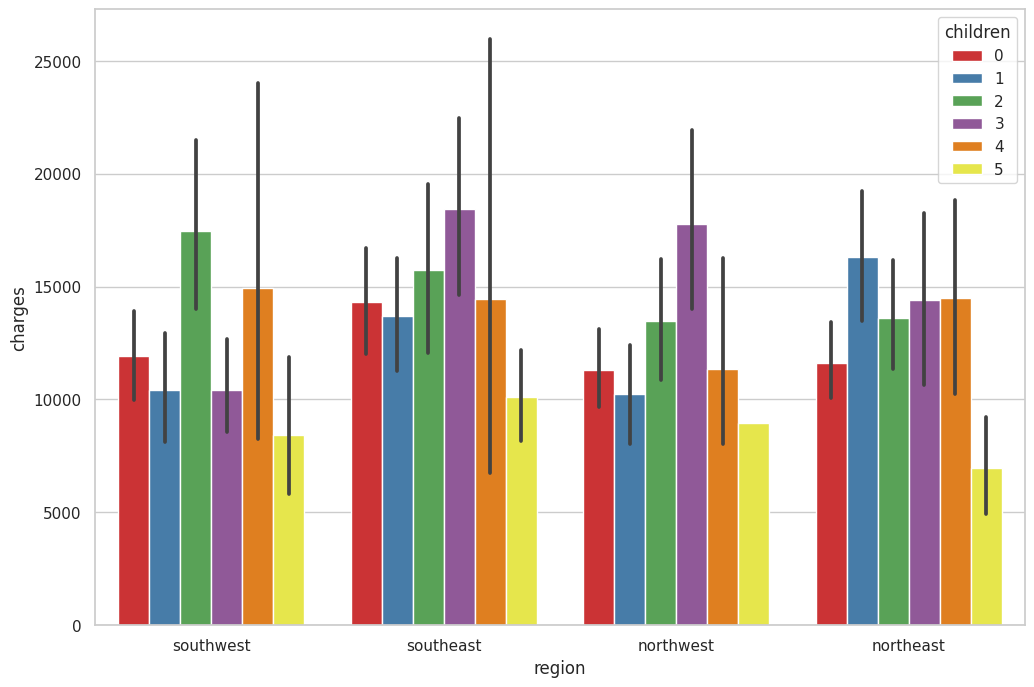

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

The code creates three separate scatter plots using sns.lmplot to visualize the relationship between 'age', 'bmi', and 'children' with 'charges'. Each scatter plot is differentiated by the 'smoker' category using the hue parameter, and different color palettes ('Set1', 'Set2', 'Set3') are used for each plot.






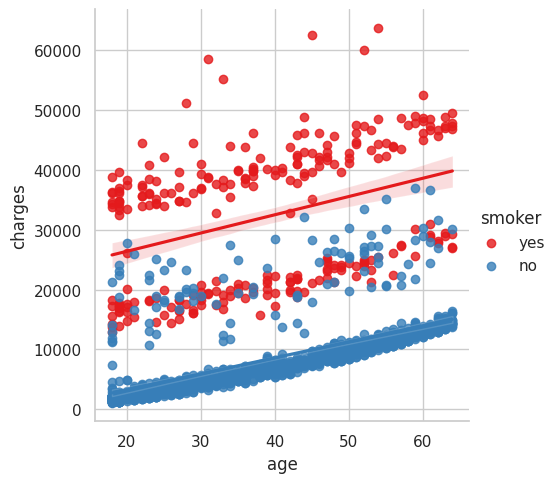

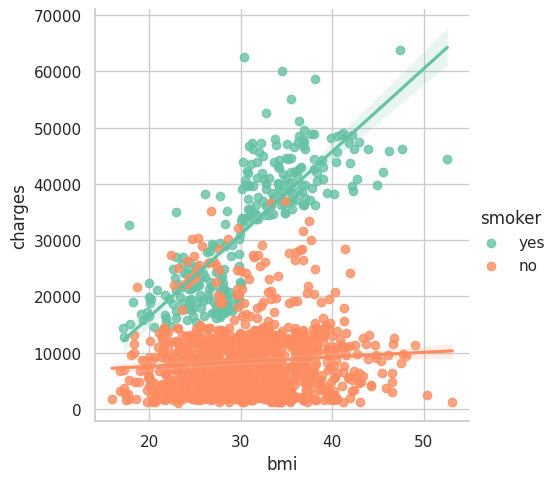

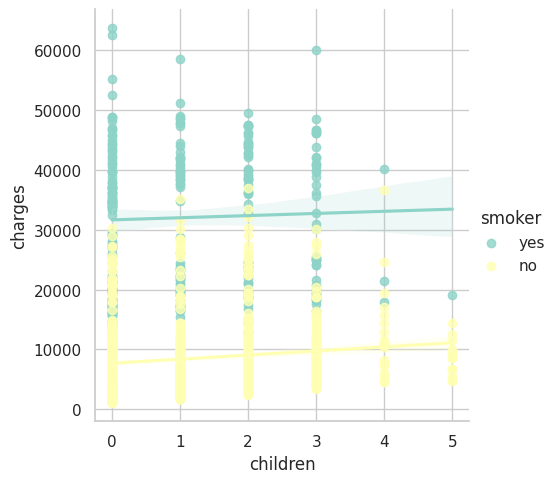

In [13]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

The code creates a violin plot using sns.violinplot to visualize the distribution of 'charges' based on the number of 'children'. The plot is grouped by the 'smoker' category using the hue parameter, and the 'inferno' color palette is used. The orientation of the plot is vertical (orient='v').



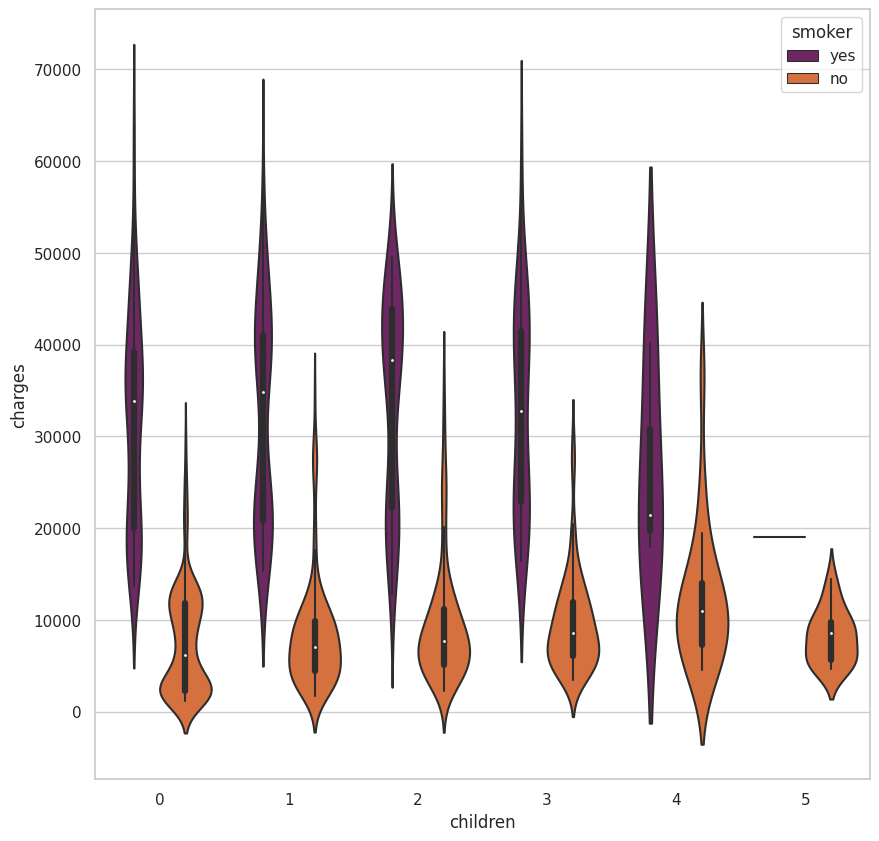

In [14]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [15]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

The code uses LabelEncoder from scikit-learn to convert the categorical labels in the 'sex', 'smoker', and 'region' columns of the dataframe into numerical representations. The fit method is used to fit the encoder on the unique values of each column, and the transform method is used to perform the label encoding. Finally, the dtypes attribute is used to display the data types of the dataframe columns after the label encoding.






In [16]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

The code creates a single subplot with a specified size using seaborn (sns) and matplotlib (plt). It then generates a heatmap of the correlation matrix of the 'df' dataframe, annotating the heatmap cells with the correlation values and using a cool color palette.






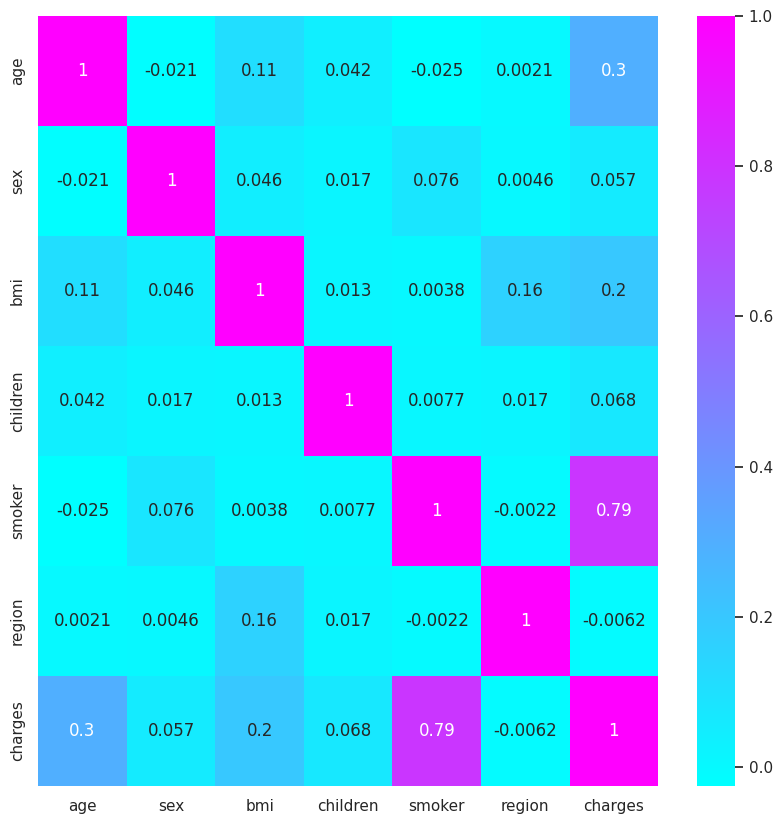

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

# Training model

## Linear Regression

The code imports the necessary libraries for performing regression analysis and splitting the data into training and testing sets. It then fits a linear regression model on the training data, prints the intercept and coefficients of the model, and calculates the coefficient of determination (R-squared) score on the test data.






In [18]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


## Ridge Regression

The code imports the Ridge regression model from scikit-learn, creates a Ridge regression object with a specified regularization parameter (alpha), fits the model on the training data, and prints the intercept, coefficients, and R-squared score of the model on the test data.



In [19]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495825
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141


## Lasso Regression

The code imports the Lasso regression model from scikit-learn, creates a Lasso regression object with specified parameters, fits the model on the training data, and prints the intercept, coefficients, and R-squared score of the model on the test data.






In [20]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.83892903954
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


## Random Forest Regressor

The code imports the RandomForestRegressor model from scikit-learn, creates a RandomForestRegressor object with specified parameters, fits the model on the training data, makes predictions on both the training and test data, and prints the mean squared error (MSE) for both the training and test data.






In [21]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' %
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))

MSE train data: 3628893.887, MSE test data: 19730453.910


### Results and analysis

The code creates a scatter plot with predicted values on the x-axis and the difference between predicted and actual values on the y-axis. It plots the points for both the training and test data, sets labels for the x-axis and y-axis, adds a legend, and draws a horizontal line at y = 0.



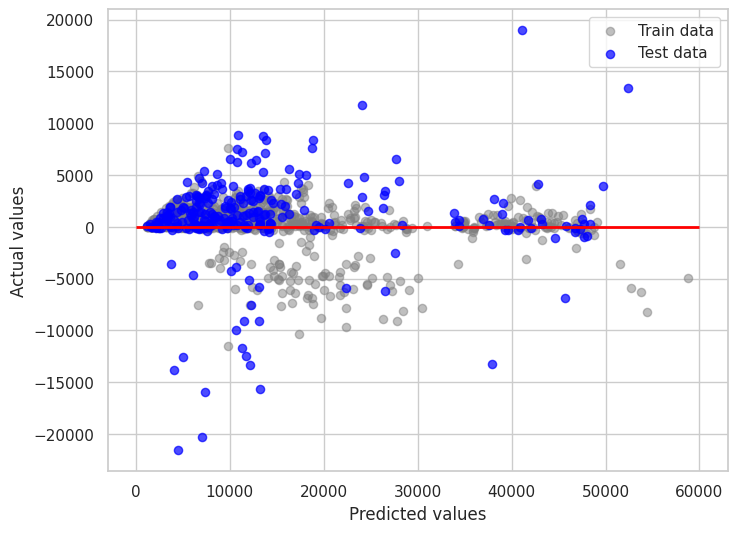

In [22]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

The code calculates the feature importances using the RandomForestRegressor model, sorts them in descending order, and prints the ranked list of features along with their corresponding importances. It then creates a bar plot to visualize the feature importances, with the features on the x-axis and the importances on the y-axis. The bars are color-coded and error bars are added based on the standard deviation of importances across the individual decision trees in the random forest.



Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

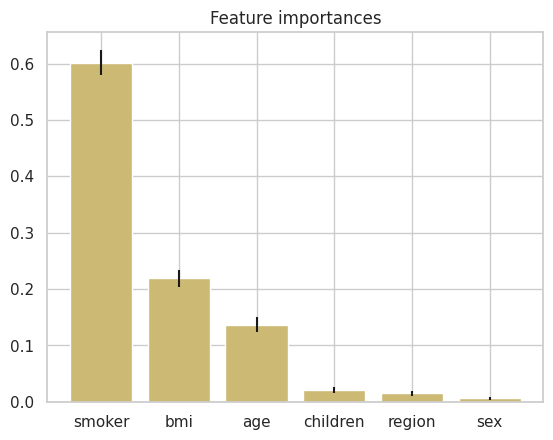

In [23]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

## Polynomial Regression

The code performs polynomial regression by transforming the input features x into polynomial features of degree 2 using PolynomialFeatures. It then splits the data into training and testing sets, fits a linear regression model (Pol_reg) to the training data, and makes predictions on both the training and testing data. Finally, it prints the intercept, coefficients, and the R-squared score of the model on the testing data.






In [24]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.8817052531285
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345227


In [25]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477652
Mean Squared Error: 18895160.098780397
Root Mean Squared Error: 4346.856346692446


In [26]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
